## Searching Algorithm to obtain n1, and lambda minimizing the Expected Sample Size

#### Part 2 of this code provide the Table 1 

In [1]:
import numpy as np
import pandas as pd
from math import comb
from scipy.stats import binom
from math import sqrt as sqrt
from math import ceil as ceil
from scipy.stats import norm
import matplotlib.pyplot as plt

### Generate n2

In [2]:
#  p2 - Probability of the control group (theta)

#  p1 - Probability of the treatment selected from stage 1
#  p1 = p2 (theta) + delta 2

def sample_size(p1,p2,alpha,power):
    q1=1-p1
    q2=1-p2

    P=(p1+p2)/2
    Q=1-P

    Za=norm.ppf(1-alpha)
    Zb=norm.ppf(power)

    A = (Za*sqrt(2*P*Q)+Zb*sqrt(p1*q1+p2*q2))**2

    n2 = A*(1+sqrt(1+4*(p1-p2)/A))**2/(4*(p1-p2)**2)

    return n2

# Part-1
### Generate Table 1 for individual Theta0, K, and Beta

In [3]:
alpha=0.05
d1=0.05  # Delta 1
d2=0.2  # Delta 2


def Expected_Sample(Theta0, K, Beta):


    j=0
    t0=Theta0
    t1=t0+d1  # Theta1
    t2=t0+d2  # Theta2
    
    En_arr_min=[]
    N_arr_min=[]
    n1_arr=[]
    minimum_check=[]
    beta1_arr_fin=[]
    beta2_arr_fin=[]
    n2_arr_fin=[]
    En0_arr_fin=[]
    En1_arr_fin=[]
    N_arr_fin=[]
    pi0_bar_arr_fin=[]

    L=list(np.arange (0.20, 0.8, 0.005))
    
    
    for l in L:
        En_arr=[]
        beta1_arr=[]
        beta2_arr=[]
        n2_arr=[]
        En0_arr=[]
        En1_arr=[]
        N_arr=[]
        pi0_bar_arr=[]
    
        for n1 in range(1,50):
            beta1=0
            n0=int(float(l)*n1)+1
            for x in range(n0,n1+1):
                for j in range(0,K):
                    beta1 += comb(K-1,j)*binom.pmf(x,n1,t2)*\
                           (binom.pmf(x,n1,t1)**j)*(binom.cdf(x-1,n1,t1)**(K-1-j))/(j+1)
            
            beta2 = Beta/beta1
            beta1_arr.append(beta1)
            beta2_arr.append(beta2)
    
            if beta2 < 1:
                 n2=sample_size(t0+d2,t0,0.05,beta2)
    
            else:
                n2=500
    
            n2_arr.append(n2)
            
            pi0=1-binom.cdf(n0-1,n1,t0)**K
            pi1=1-(binom.cdf(n0-1,n1,t1)**(K-1))*binom.cdf(n0-1,n1,t2)
    
            pi0_bar_arr.append(1-pi0)
            
            En0=K*n1+pi0*2*n2
            En1=K*n1+pi1*2*n2
    
            En0_arr.append(En0)
            En1_arr.append(En1)
            
            En=0.5*En0+0.5*En1
        
            if not(En > 0):
                En_arr.append(1000)
            else:
                En_arr.append(En)


        x = En_arr.index( min(En_arr))
        n1=x+1

        n1_arr.append(n1)
    
        beta1_arr_fin.append(beta1_arr[x])
        beta2_arr_fin.append(beta2_arr[x])
    
        n2_arr_fin.append(ceil(n2_arr[x]))
    
        En0_arr_fin.append(En0_arr[x])

        if ceil(n2_arr[x])<min(En_arr):
            En_arr_min.append(min(En_arr))
        
        else:
            En_arr_min.append(500) 
        

        N_arr_fin=[a+b for a,b in \
               zip(list(np.array(n1_arr) * K),list(np.array(n2_arr_fin) * 2))]
    
        pi0_bar_arr_fin.append(pi0_bar_arr[x])
    
    for i in range(len(En_arr_min)):
        if En_arr_min[i]==min(En_arr_min):
            minimum_check.append('Minimum')
        else:
            minimum_check.append('NA')

    L=L[:n2_arr_fin.index(500)]
    En_arr_min=En_arr_min[:len(L)]
    

    Lambda_arr=[]
    Lambda_range=[]
    for i in range(len(En_arr_min)):
        if min(En_arr_min)==En_arr_min[i]:
            Lambda_arr.append(L[i])
            
    Lambda_range=[min(Lambda_arr),max(Lambda_arr)]

    x1 = En_arr_min.index(min(En_arr_min))

    print ('n1 =',n1_arr[x1])
    print ('n2 =',n2_arr_fin[x1])
    print ('Range of Lambda =',Lambda_range)
    print ('Expected Sample Size =',min(En_arr_min), '\n') 

    
    plt.plot(L, En_arr_min)
    plt.xlabel('Lambda')
    plt.ylabel('E(N)')
    plt.title("Lambda vs E(N)")
    plt.show()

    n1_arr=n1_arr[:len(L)]
    n2_arr_fin=n2_arr_fin[:len(L)]
    En0_arr_fin=En0_arr_fin[:len(L)]
    N_arr_min=N_arr_min[:len(L)]
    minimum_check=minimum_check[:len(L)]
    N_arr_fin=N_arr_fin[:len(L)]
    pi0_bar_arr_fin=pi0_bar_arr_fin[:len(L)]
    beta1_arr_fin=beta1_arr_fin[:len(L)]
    beta2_arr_fin= beta2_arr_fin[:len(L)]
    
   
    data = {
        "n1": n1_arr,
        "n2": n2_arr_fin,
        "Lambda": L,
        "E0(N)":En0_arr_fin,
        "E(N)": En_arr_min,
        "Minimum":minimum_check,
        "N(max)":N_arr_fin,
        "1-pi0":pi0_bar_arr_fin,
        "Beta 1": beta1_arr_fin,
        "Beta 2": beta2_arr_fin,
        
        
    }

    table1 = pd.DataFrame(data)
 
    print('Alpha =',alpha, ', Delta 1 =',d1,', Delta 2 =',d2)
    print('Theta 0 =',t0, ', K =',K, ', Beta =',Beta, '\n')
    print('*** Minimum column is to identify the minimum E(N) with ease *** \n')
    return table1
    

# Run ---> Expected_Sample()

## Expected_Sample(Theta0, K, Beta)

#### Theta0 = Estimate from the control treatment (0.2, 0.4, 0.6)
#### K = Number of Treatments (2, 3, 4)
#### Beta = Overall Power of the Test (0.70, 0.75, 0.80)

n1 = 28
n2 = 89
Range of Lambda = [0.2900000000000001, 0.3200000000000001]
Expected Sample Size = 150.28590550752847 



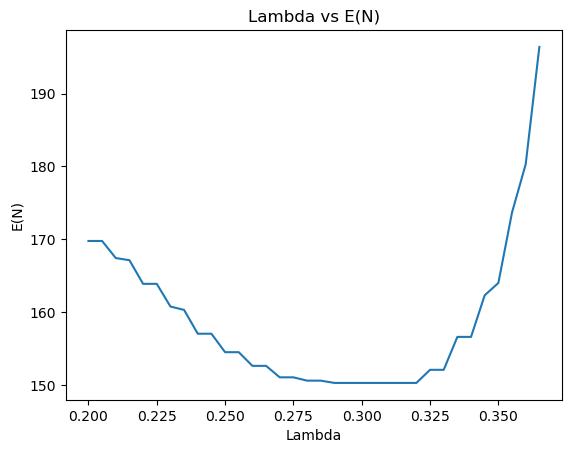

Alpha = 0.05 , Delta 1 = 0.05 , Delta 2 = 0.2
Theta 0 = 0.2 , K = 2 , Beta = 0.7 

*** Minimum column is to identify the minimum E(N) with ease *** 



,n1,n2,Lambda,E0(N),E(N),Minimum,N(max),1-pi0,Beta 1,Beta 2
0,20,83,0.200,138.992371,169.772123,NA,206,0.396457,0.831129,0.842228
1,20,83,0.205,138.992371,169.772123,NA,206,0.396457,0.831129,0.842228
2,24,77,0.210,135.640871,167.427008,NA,202,0.430195,0.855851,0.817899
3,19,86,0.215,131.237849,167.131952,NA,210,0.453317,0.817542,0.856225
4,23,80,0.220,127.756280,163.886016,NA,206,0.482590,0.845115,0.828290
5,23,80,0.225,127.756280,163.886016,NA,206,0.482590,0.845115,0.828290
6,22,82,0.230,119.873655,160.774371,NA,208,0.536759,0.831637,0.841714
7,26,77,0.235,119.690361,160.306210,NA,206,0.558556,0.857104,0.816703
8,25,80,0.240,112.078305,157.040502,NA,210,0.608455,0.843803,0.829578
9,25,80,0.245,112.078305,157.040502,NA,210,0.608455,0.843803,0.829578


In [4]:
Expected_Sample(0.2, 2, 0.70)

# Part-2
### Complete Table 1
##### Approximately it takes 1hr 30mins  

In [5]:
alpha=0.05
d1=0.05  # Delta 1
d2=0.2  # Delta 
Theta0=[0.2,0.4,0.6]
k=[2,3,4,5]
Beta=[0.70,0.75,0.80]

Theta0_fin=[]
K_fin=[]
n1_fin=[]
n2_fin=[]
Lambda_fin=[]
En0_fin=[]
En_fin=[]
Nmax_fin=[]
pi0_bar_fin=[]
beta1_fin=[]
beta2_fin=[]
beta_fin=[]

for t0 in Theta0:
    for K in k:
        for B in Beta:
            
            j=0
            #t0=Theta0
            t1=t0+d1  # Theta1
            t2=t0+d2  # Theta2
            
            En_arr_min=[]
            n1_arr=[]
            minimum_check=[]
            beta1_arr_fin=[]
            beta2_arr_fin=[]
            n2_arr_fin=[]
            En0_arr_fin=[]
            En1_arr_fin=[]
            N_arr_fin=[]
            pi0_bar_arr_fin=[]
            
            L=list(np.arange (0.20, 0.8, 0.005))
            
            for l in L:
                En_arr=[]
                beta1_arr=[]
                beta2_arr=[]
                n2_arr=[]
                En0_arr=[]
                En1_arr=[]
                N_arr=[]
                pi0_bar_arr=[]
            
                for n1 in range(1,100):
                    beta1=0
                    n0=int(float(l)*n1)+1
                    for x in range(n0,n1+1):
                        for j in range(0,K):
                            beta1 += comb(K-1,j)*binom.pmf(x,n1,t2)*(binom.pmf(x,n1,t1)**j)*(binom.cdf(x-1,n1,t1)**(K-1-j))/(j+1)
                    
                    beta2 = B/beta1
                    beta1_arr.append(beta1)
                    beta2_arr.append(beta2)
            
                    if beta2 < 1:
                         n2=sample_size(t0+d2,t0,0.05,beta2)
            
                    else:
                        n2=500
            
                    n2_arr.append(n2)
                    
                    pi0=1-binom.cdf(n0-1,n1,t0)**K
                    pi1=1-(binom.cdf(n0-1,n1,t1)**(K-1))*binom.cdf(n0-1,n1,t2)
            
                    pi0_bar_arr.append(1-pi0)
                    
                    En0=K*n1+pi0*2*n2
                    En1=K*n1+pi1*2*n2
            
                    En0_arr.append(En0)
                    En1_arr.append(En1)
                    
                    En=0.5*En0+0.5*En1
                    #N=En0+En1
                    
                    if not(En > 0):
                        En_arr.append(1000)
                    else:
                        En_arr.append(En)
                                
            
                x = En_arr.index( min(En_arr))
                n1=x+1
                
                En_arr_min.append(min(En_arr))
                n1_arr.append(n1)
            
                beta1_arr_fin.append(beta1_arr[x])
                beta2_arr_fin.append(beta2_arr[x])
            
                n2_arr_fin.append(ceil(n2_arr[x]))
            
                En0_arr_fin.append(En0_arr[x])
                En1_arr_fin.append(En1_arr[x])
            
            
                N_arr_fin=[a+b for a,b in zip(list(np.array(n1_arr) * K),list(np.array(n2_arr_fin) * 2))]
            
                pi0_bar_arr_fin.append(pi0_bar_arr[x])
            
            for i in range(len(En_arr_min)):
                if En_arr_min[i]==min(En_arr_min):
                    minimum_check.append('Minimum')
                else:
                    minimum_check.append('NA')

            L=L[:n2_arr_fin.index(500)]
            En_arr_min=En_arr_min[:len(L)]

            n1_arr=n1_arr[:len(L)]
            n2_arr=n2_arr_fin[:len(L)]
            En0_arr_fin=En0_arr_fin[:len(L)]
           # N_arr_min=N_arr_min[:len(L)]
            N_arr_fin=N_arr_fin[:len(L)]
            pi0_bar_arr_fin=pi0_bar_arr_fin[:len(L)]
            beta1_arr_fin=beta1_arr_fin[:len(L)]
            beta2_arr_fin= beta2_arr_fin[:len(L)]
            beta_fin=beta_fin[:len(L)]
            
            Lambda_arr=[]
            Lambda_range=[]
            for i in range(len(En_arr_min)):
                if min(En_arr_min)==En_arr_min[i]:
                    Lambda_arr.append(L[i])
                    
            Lambda_min=round(min(Lambda_arr),3) 
            Lambda_max=round(max(Lambda_arr),3) 
            Lambda_range=[Lambda_min, Lambda_max]
            
            x1 = En_arr_min.index(min(En_arr_min))
            
            ''' 
            print ('n1 =',n1_arr[x1])
            print ('n2 =',n2_arr_fin[x1])
            print ('Range of Lambda =',Lambda_range)
            print ('Expected Sample Size =',min(En_arr_min), '\n') 
            '''   
        
            Theta0_fin.append(t0)
            K_fin.append(K)
            n1_fin.append(n1_arr[x1])
            n2_fin.append(n2_arr[x1])
            Lambda_fin.append(Lambda_range)
            En0_fin.append(En0_arr_fin[x1])
            En_fin.append(En_arr_min[x1])
            Nmax_fin.append(N_arr_fin[x1])
            pi0_bar_fin.append(pi0_bar_arr_fin[x1])
            beta1_fin.append(beta1_arr_fin[x1])
            beta2_fin.append(beta2_arr_fin[x1])
            beta_fin.append(B)
            
           
            
data = {
    "Theta0":Theta0_fin,
    "K":K_fin,
    "n1":n1_fin,
    "n2":n2_fin,
    "Lambda": Lambda_fin,
    "E0(N)":En0_fin,
    "E(N)": En_fin,
    "N":Nmax_fin,
    "1-pi0":pi0_bar_fin,
    "Beta 1": beta1_fin,
    "Beta 2": beta2_fin,
    "Beta":beta_fin
    
    
}

table1 = pd.DataFrame(data)

print('Alpha =',alpha, ', Delta 1 =',d1,', Delta 2 =',d2)
print('Theta 0 =',t0, ', K =',K, ', Beta =',Beta, '\n')

table1


Alpha = 0.05 , Delta 1 = 0.05 , Delta 2 = 0.2
Theta 0 = 0.6 , K = 5 , Beta = [0.7, 0.75, 0.8] 



,Theta0,K,n1,n2,Lambda,E0(N),E(N),N,1-pi0,Beta 1,Beta 2,Beta
0,0.2,2,28,89,"[0.29, 0.32]",86.575151,150.285906,234,0.828037,0.804196,0.870435,0.70
1,0.2,2,32,97,"[0.285, 0.31]",96.976911,168.398476,258,0.828405,0.838075,0.894907,0.75
2,0.2,2,40,99,"[0.275, 0.295]",112.962212,189.965180,278,0.832647,0.886861,0.902058,0.80
3,0.2,3,31,98,"[0.295, 0.32]",133.468681,202.430818,289,0.792481,0.778471,0.899198,0.70
4,0.2,3,38,102,"[0.29, 0.315]",149.727680,226.945540,318,0.824478,0.823113,0.911175,0.75
5,0.2,3,45,111,"[0.29, 0.31]",167.869621,256.616638,357,0.851781,0.857957,0.932448,0.80
6,0.2,4,34,105,"[0.295, 0.32]",183.076348,256.617302,346,0.774036,0.763112,0.917296,0.70
7,0.2,4,41,109,"[0.295, 0.315]",205.917081,287.994036,382,0.807347,0.808166,0.928027,0.75
8,0.2,4,48,120,"[0.295, 0.31]",231.074203,325.856709,432,0.836214,0.844095,0.947760,0.80
9,0.2,5,37,109,"[0.3, 0.32]",235.667247,312.847449,403,0.766782,0.754576,0.927673,0.70
